In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def willow_tree_pricing(S0, K, r, sigma, T, N, option_type="call", plot_tree=False):
    """
    使用柳樹法計算歐式期權價格，並可視化資產價格樹和期權價值樹
    :param S0: 初始資產價格
    :param K: 執行價格
    :param r: 無風險利率
    :param sigma: 波動率
    :param T: 到期時間
    :param N: 時間步數
    :param option_type: "call" 或 "put"
    :param plot_tree: 是否繪製樹結構
    :return: 期權價格
    """
    # 時間步長
    dt = T / N
    discount = np.exp(-r * dt)

    # 上升和下降因子
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u

    # 各步的機率
    p = (np.exp(r * dt) - d) / (u - d)

    # 建立資產價格樹
    asset_tree = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            asset_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # 初始化期權價值樹
    option_tree = np.zeros((N + 1, N + 1))

    # 計算到期時的期權價值
    if option_type == "call":
        option_tree[:, N] = np.maximum(0, asset_tree[:, N] - K)
    elif option_type == "put":
        option_tree[:, N] = np.maximum(0, K - asset_tree[:, N])

    # 回溯計算期權價格
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_tree[j, i] = discount * (p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1])

    # 如果需要，繪製樹結構
    if plot_tree:
        plot_trees(asset_tree, option_tree, N)

    return option_tree[0, 0]

In [8]:
def plot_trees(asset_tree, option_tree, N):
    """
    繪製資產價格樹和期權價值樹
    :param asset_tree: 資產價格樹
    :param option_tree: 期權價值樹
    :param N: 時間步數
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # 資產價格樹
    axes[0].set_title("Asset Price Tree")
    for i in range(N + 1):
        for j in range(i + 1):
            axes[0].scatter(i, asset_tree[j, i], color="blue")
            axes[0].text(i, asset_tree[j, i], f"{asset_tree[j, i]:.2f}", fontsize=8, ha="center")
    axes[0].set_xlabel("Time Steps")
    axes[0].set_ylabel("Asset Price")

    # 期權價值樹
    axes[1].set_title("Option Value Tree")
    for i in range(N + 1):
        for j in range(i + 1):
            axes[1].scatter(i, option_tree[j, i], color="green")
            axes[1].text(i, option_tree[j, i], f"{option_tree[j, i]:.2f}", fontsize=8, ha="center")
    axes[1].set_xlabel("Time Steps")
    axes[1].set_ylabel("Option Value")

    plt.tight_layout()
    plt.show()

In [9]:
# 測試範例
S0 = 100  # 初始資產價格
K = 100   # 執行價格
r = 0.05  # 無風險利率
sigma = 0.2  # 波動率
T = 1     # 到期時間（以年為單位）
N = 5     # 時間步數（減少以更清晰地觀察樹結構）

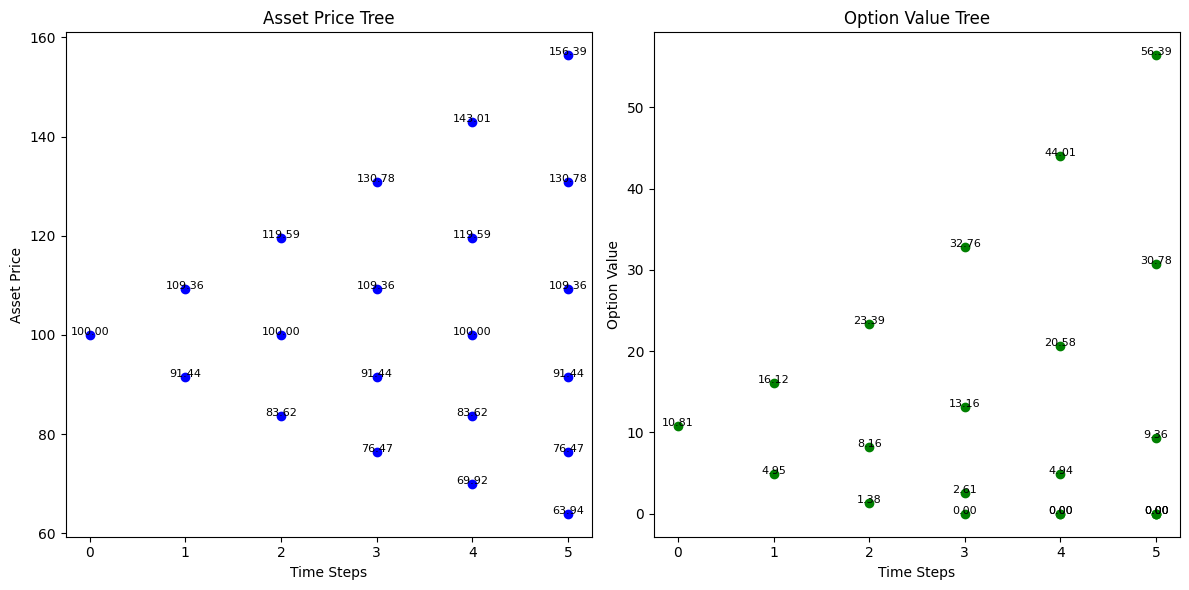

歐式看漲期權價格: 10.81


In [10]:
call_price = willow_tree_pricing(S0, K, r, sigma, T, N, option_type="call", plot_tree=True)
print(f"歐式看漲期權價格: {call_price:.2f}")